In [161]:
import matplotlib as mpl
mpl.rc('font',family = 'NanumBarunGothic')

In [162]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

# 년도별 학교 관련 기사의 뉴스 플랫폼 분석

## 1. 데이터 파일 읽기
각 csv 파일은 2015년에서 2018년까지 각 년도 별로 학교 관련 기사가 실린 뉴스 플랫폼의 수를 저장하고 있음.
그러나, 2018년은 1분기에서 3분기까지의 데이터만 저장되어 있음.

In [1]:
dfs={}
for x in range(2015,2019):
    dfs['df{0}'.format(str(x))]=pd.read_csv('data/'+str(x)+'/newsplatforms_'+str(x)+'_count.csv',names=['newsplatform','count'], header=None)
#df2015=pd.read_csv('newsplatforms_2015_count.csv',names=['newsplatform','count'], header=None)
#df2016=pd.read_csv('newsplatforms_2016_count.csv',names=['newsplatform','count'], header=None)
#df2017=pd.read_csv('newsplatforms_2017_count.csv',names=['newsplatform','count'], header=None)
#df2018=pd.read_csv('newsplatforms_2018_count.csv',names=['newsplatform','count'], header=None)

## 2. 데이터 분석하기

### 2.1 년도별로 데이터 분석하기

In [164]:
df2015_desc = dfs['df2015'].describe()
df2015_desc.rename(columns={'count':'2015'},inplace=True)
df2015_desc.loc['total']=[dfs['df2015']['count'].sum()]

In [165]:
df2016_desc = dfs['df2016'].describe()
df2016_desc.rename(columns= {'count':'2016'},inplace=True)
df2016_desc.loc['total']=[dfs['df2016']['count'].sum()]

In [166]:
df2017_desc = dfs['df2017'].describe()
df2017_desc.rename(columns={'count':'2017'},inplace=True)
df2017_desc.loc['total']=[dfs['df2017']['count'].sum()]

In [167]:
df2018_desc = dfs['df2018'].describe()
df2018_desc.rename(columns={'count':'2018'},inplace=True)
df2018_desc.loc['total']=[dfs['df2018']['count'].sum()]

In [168]:
dfYears_desc = pd.concat([df2015_desc,df2016_desc,df2017_desc,df2018_desc],names=['2015','2016','2017','2018'],axis=1)
dfYears_desc['mean'] = df_desc.mean(axis=1)
dfYears_desc

,2015,2016,2017,2018,mean
count,69.000000,52.000000,54.000000,51.000000,56.500000
mean,3.623188,2.692308,3.148148,1.960784,2.856107
std,4.176621,2.668175,2.505898,1.355888,2.676645
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,1.750000
75%,5.000000,3.250000,4.000000,2.500000,3.687500
max,21.000000,17.000000,10.000000,6.000000,13.500000
total,250.000000,140.000000,170.000000,100.000000,165.000000


### 기본 통계 정보 분석
1. 각 년도 별로 평균 56개의 뉴스플랫폼에 평균 165개의 기사가 실림.
2. 제2사분위수의 평균이 1.75로 1~2개의 학교 관련 기사를 실은 뉴스플랫폼의 수가 절반에 달함.
3. 2015년도에는 실린 기사의 수는 250개로 가장 많음. 이는 2015년도에 제1회 입학식이 시행되었기 때문으로 보임.
4. 2015년도와 2018년도를 제외하고 학교 관련 기사가 실린 수가 증가하고 있음.

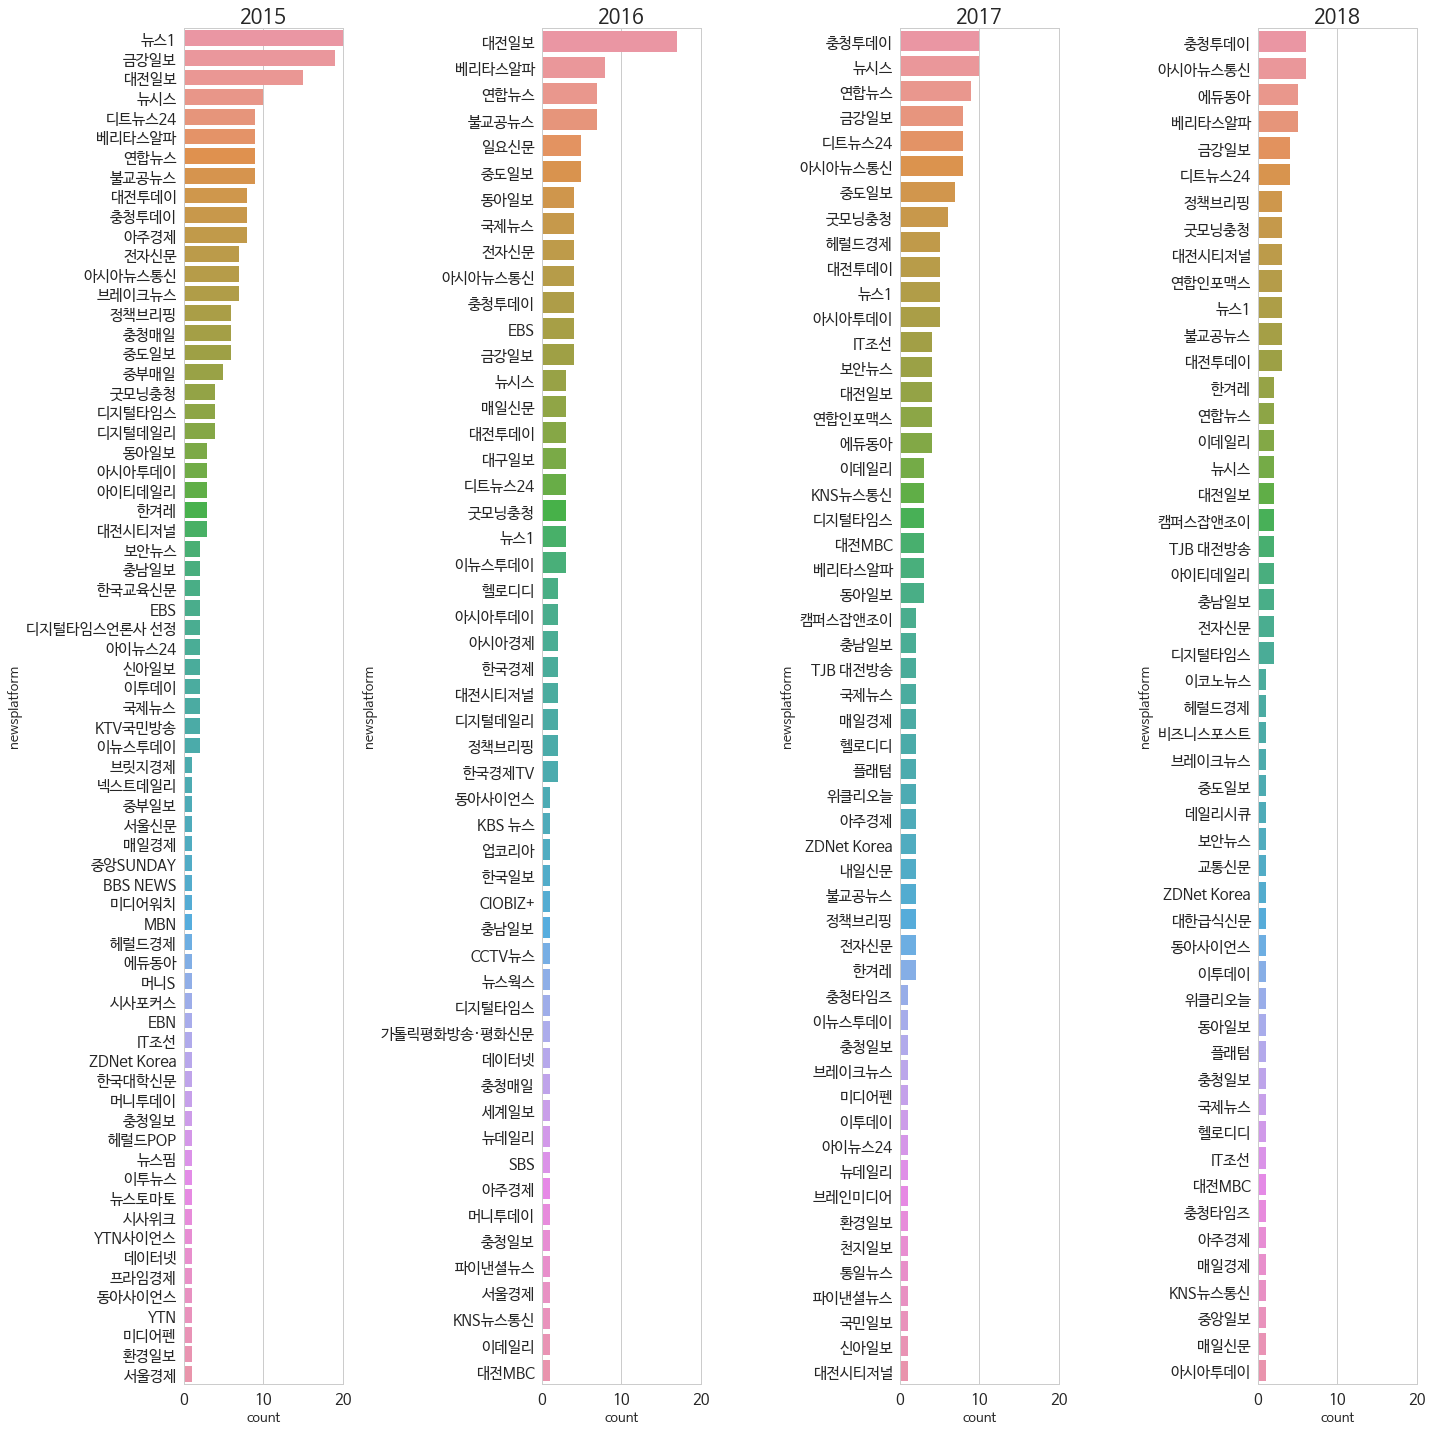

In [169]:
plt.figure(figsize=(20,20))
mpl.rc('xtick', labelsize=15) 
mpl.rc('ytick', labelsize=15) 
mpl.rc('axes', labelsize=13)
for i in range(1,5):
    plt.subplot(1,4,i)
    sns.barplot(x=dfs['df'+str(i+2014)]['count'], y =dfs['df'+str(i+2014)]['newsplatform'] )
    plt.xlim(0,20)
    plt.title(str(i+2014), size = 20)
plt.tight_layout()
plt.show()

### 그래프 분석
1. 2018년을 제외하고 학교 관련 기사를 1개만 실은 뉴스플랫폼의 수는 감소함.
2. 학교가 대전에 위치하여 대전, 충청의 뉴스플랫폼에서 기사가 많이 실림.
3. 2018년은 1분기에서 3분기까지의 데이터밖에 존재하지 않으므로 상대적으로 데이터의 수가 적음.

### 2.2 모든 데이터 분석하기

In [170]:
dfTemp1 = pd.merge(dfs['df2015'],dfs['df2016'],on = 'newsplatform',how = 'outer')
dfTemp1['count']= dfTemp1.sum(axis=1)
# merge() 실행 시 키가 아닌 같은 이름의 컬럼에는 접미사가 자동으로 붙여짐.
dfTemp1.drop(columns=['count_x','count_y'],inplace=True)
dfTemp2 = pd.merge(dfs['df2017'],dfs['df2018'],on = 'newsplatform',how = 'outer')
dfTemp2['count']=dfTemp2.sum(axis=1)
dfTemp2.drop(columns=['count_x','count_y'],inplace=True)
df = pd.merge(dfTemp1,dfTemp2,on = 'newsplatform',how = 'outer')
df['count']=df.sum(axis=1)
df.drop(columns=['count_x','count_y'],inplace=True)

In [171]:
dfAll_desc = df.describe()
dfAll_desc.loc['total']=[df['count'].sum()]
dfAll_desc.rename(columns={'count':'all'},inplace=True)
dfAll_desc

,all
count,107.000000
mean,6.168224
std,8.193976
min,1.000000
25%,1.000000
50%,2.000000
75%,7.000000
max,38.000000
total,660.000000


### 기본 통계 정보 분석
1. 2015년 1월 초부터 2018년 9월 말까지 총 107개의 뉴스플랫폼에 660개의 기사가 실림. 2018년도 데이터의 양을 고려했을 때, 월 평균 14개의 기사가 실림.
2. 제2사분위수가 2로 1~2개의 학교 관련 기사를 실은 뉴스플랫폼의 수가 절반에 달함.

In [172]:
df.sort_values(by=['count'],ascending=False,inplace=True)
df.head()

,newsplatform,count
2,대전일보,38.0
1,금강일보,35.0
0,뉴스1,32.0
9,충청투데이,28.0
6,연합뉴스,27.0


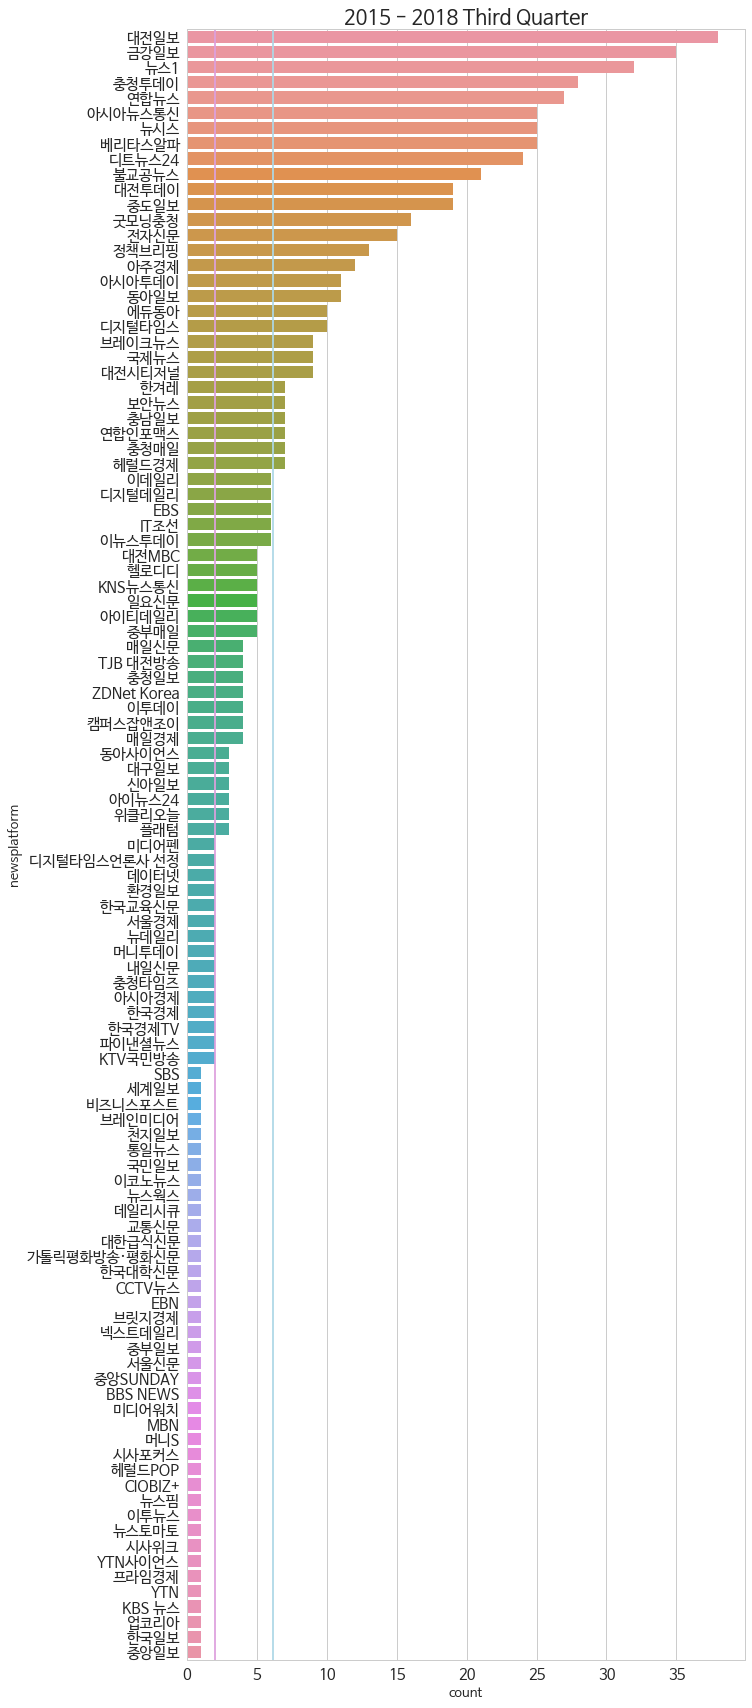

In [173]:
plt.figure(figsize=(10,30))
sns.barplot(y=df['newsplatform'],x=df['count'])
plt.axvline(df['count'].median(), linestyle='solid', color='plum')
plt.axvline(df['count'].mean(), linestyle='solid', color = 'lightblue')
plt.title('2015 - 2018 Third Quarter',size=20)
plt.show()

### 그래프 분석
1. 평균값과 중앙값의 차이가 큼. 뉴스플랫폼에서 게시한 학교 관련 기사 수가 6개 미만인 뉴스 플랫폼의 수가 많음.
2. '대전일보'에서 가장 많이 학교 관련 기사를 게시함.